In [16]:
import gymnasium as gym
import gym_super_mario_bros
from nes_py.wrappers import JoypadSpace
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
from gym.wrappers import GrayScaleObservation, ResizeObservation
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
from stable_baselines3 import DQN

class FixedJoypadSpace(JoypadSpace):
    def reset(self, **kwargs):
        # Remove unsupported arguments for nes_py
        kwargs.pop('seed', None)
        kwargs.pop('options', None)
        return super().reset()

# 1. Create base environment
env = gym_super_mario_bros.make('SuperMarioBros-v3', apply_api_compatibility=True)

# 2. Simplify controls
env = FixedJoypadSpace(env, SIMPLE_MOVEMENT)

# 3. Preprocess observations
env = GrayScaleObservation(env, keep_dim=True)  # Convert to grayscale
env = ResizeObservation(env, shape=(84, 84))    # Resize to 84x84 (standard for DQN)

# 4. Vectorize environment (required for SB3)
env = DummyVecEnv([lambda: env])

# 5. Stack frames (4 frames)
env = VecFrameStack(env, n_stack=4, channels_order='last')

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

model = DQN("CnnPolicy", env, verbose=1, 
            buffer_size=5000, 
            tensorboard_log="./dqn_logs/")

# Train the model
model.learn(total_timesteps=5000)  # Reduced from 1M for demonstration

# Save the model
model.save("dqn_super_mario")

Using cpu device
Wrapping the env in a VecTransposeImage.
Logging to ./dqn_logs/DQN_7


C:\Users\saina\anaconda3\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Available Tags: {'images': [], 'audio': [], 'histograms': [], 'scalars': ['rollout/exploration_rate', 'time/fps', 'train/learning_rate', 'train/loss'], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}


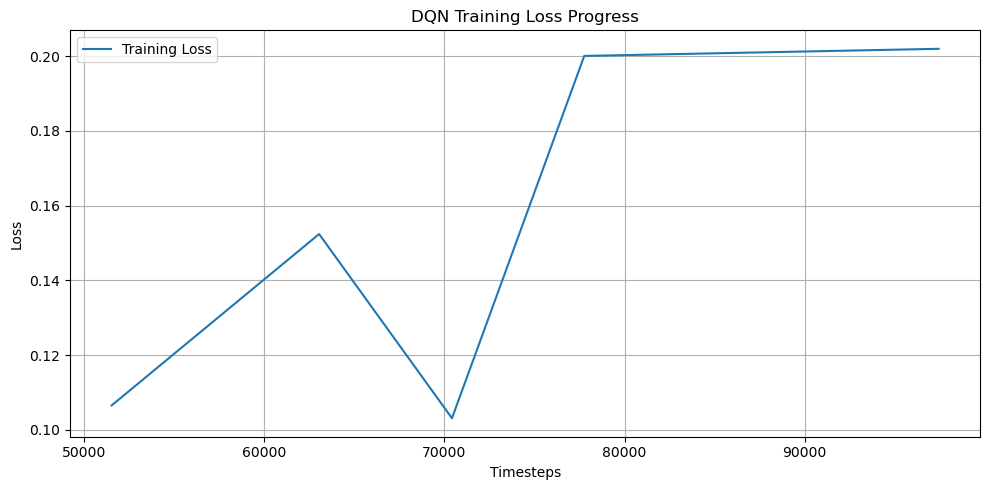

In [19]:
import os
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

# Path to your TensorBoard log folder
log_dir = "./dqn_logs/"

# List all run folders
runs = [os.path.join(log_dir, d) for d in os.listdir(log_dir) if os.path.isdir(os.path.join(log_dir, d))]

# Choose the first run (adjust if needed)
event_path = runs[0]

# Load TensorBoard logs
event_acc = EventAccumulator(event_path)
event_acc.Reload()

# List available tags (to identify the correct key)
tags = event_acc.Tags()
print("Available Tags:", tags)

# Get the training loss values (adjust key as necessary)
losses = event_acc.Scalars('train/loss')  # Change key to other metrics if needed

# Extract timesteps (steps) and loss values
timesteps = [e.step for e in losses]
loss_values = [e.value for e in losses]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(timesteps, loss_values, label="Training Loss")
plt.xlabel("Timesteps")
plt.ylabel("Loss")
plt.title("DQN Training Loss Progress")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Available Tags: {'images': [], 'audio': [], 'histograms': [], 'scalars': ['time/fps', 'train/approx_kl', 'train/clip_fraction', 'train/clip_range', 'train/entropy_loss', 'train/explained_variance', 'train/learning_rate', 'train/loss', 'train/policy_gradient_loss', 'train/value_loss'], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}


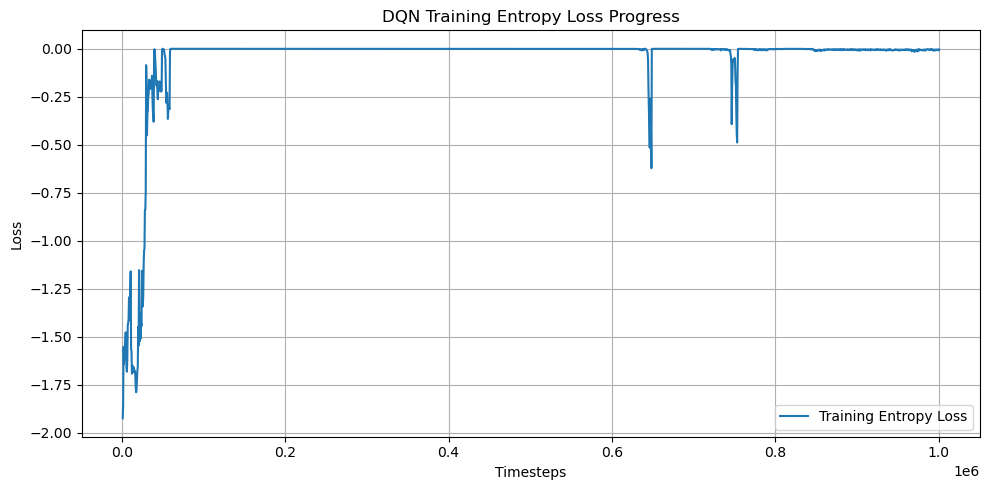

In [20]:
import os
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

# Path to your TensorBoard log folder
log_dir = "./logs/"

# List all run folders
runs = [os.path.join(log_dir, d) for d in os.listdir(log_dir) if os.path.isdir(os.path.join(log_dir, d))]

# Choose the first run (adjust if needed)
event_path = runs[0]

# Load TensorBoard logs
event_acc = EventAccumulator(event_path)
event_acc.Reload()

# List available tags (to identify the correct key)
tags = event_acc.Tags()
print("Available Tags:", tags)

# Get the training entropy loss values (change key if needed)
entropy_loss = event_acc.Scalars('train/entropy_loss')  # Change to 'train/explained_variance' or another metric

# Extract timesteps (steps) and loss values
timesteps = [e.step for e in entropy_loss]
entropy_values = [e.value for e in entropy_loss]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(timesteps, entropy_values, label="Training Entropy Loss")
plt.xlabel("Timesteps")
plt.ylabel("Loss")
plt.title("DQN Training Entropy Loss Progress")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
